In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load the data

In [2]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
# we knows all the houses are in california they don't have much difference 
interested_data = data.drop(['longitude', 'latitude'], axis=1)

In [4]:
interested_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [5]:
# map the categorical data
interested_data['ocean_proximity'] = interested_data['ocean_proximity'].map({
    'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2,  'NEAR OCEAN': 3, 'ISLAND': 4
})

In [6]:
interested_data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880,129.0,322,126,8.3252,0,452600
1,21,7099,1106.0,2401,1138,8.3014,0,358500
2,52,1467,190.0,496,177,7.2574,0,352100
3,52,1274,235.0,558,219,5.6431,0,341300
4,52,1627,280.0,565,259,3.8462,0,342200


## Missing values

In [7]:
# counts the total null values
interested_data.isnull().sum()

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [8]:
# fill the null values in the total_bedrooms col with the mean value
noNull_data = interested_data.copy()
noNull_data['total_bedrooms'] = noNull_data['total_bedrooms'].fillna(noNull_data['total_bedrooms'].mean())

In [9]:
noNull_data.isnull().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

## Checking outliers

In [10]:
noNull_data.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,1.464729,206855.816909
std,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,0.854226,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,14999.000000
25%,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,1.000000,119600.000000
50%,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,1.000000,179700.000000
75%,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,2.000000,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,4.000000,500001.000000


In [11]:
# quantile the dataframe
    # dframe: data frame
    # cols: an list with the columns in the data frame
    # min_q: a lowest cutting point 
    # max_q: a highest cutting point
def dealing_outliers(dframe, cols, min_q, max_q):
    for i in cols: 
        # get the lowest point and highest point in the data
        min_thresold, max_thresold = dframe[i].quantile([min_q, max_q])
        
        # quantile the values between the min_thresold and the max_thresold
        dframe = dframe[(dframe[i] > min_thresold) & (dframe[i] < max_thresold)]
    return dframe

In [12]:
# These are the data needs to be qunatiled
cols = ['total_rooms', 'total_bedrooms', 'households', 'median_house_value', 'housing_median_age', 'population']

# quantiled the data with higher 2% and below 98% 
noNull_outliers_data = dealing_outliers(noNull_data.copy(), cols, 0.1, 0.99)

In [13]:
noNull_outliers_data.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,9317.000000,9317.000000,9317.000000,9317.000000,9317.000000,9317.000000,9317.000000,9317.000000
mean,28.405710,2915.358914,602.317788,1649.393904,569.896104,3.844241,1.411935,208836.653429
std,9.592348,1251.878440,248.045487,644.554525,226.078903,1.470063,0.847102,88375.476270
min,13.000000,948.000000,262.000000,871.000000,288.000000,0.683100,0.000000,86200.000000
25%,20.000000,2043.000000,419.000000,1161.000000,402.000000,2.750000,1.000000,142000.000000
50%,28.000000,2627.000000,537.870553,1481.000000,510.000000,3.640600,1.000000,189800.000000
75%,35.000000,3476.000000,716.000000,1949.000000,674.000000,4.708300,2.000000,259400.000000
max,51.000000,10282.000000,1780.000000,4027.000000,1474.000000,11.112100,3.000000,500000.000000


In [14]:
noNull_outliers_data = noNull_outliers_data.reset_index(drop=True)

## Get inputs and targets

In [15]:
input_data = noNull_outliers_data.iloc[:, :len(noNull_outliers_data.columns)-1]
target_data = noNull_outliers_data['median_house_value']

#input_data = noNull_data.iloc[:, :len(noNull_outliers_data.columns)-1]
#target_data = noNull_data['median_house_value']

## Checking linearity

In [16]:
# drop the ocean_proximity because it is a categorical data
input_cols = input_data.columns.drop(['ocean_proximity'])
len(input_cols)

6

In [17]:
# plot the data by scatter plot
    # input_df: input data farme
    # y: target
    # input_cols: a list with input columns
    
def plot(input_df, y, input_cols):
    for i in input_cols:
        x = input_df[i]
        plt.figure(figsize=(5,3))
        plt.scatter(x, y)
        plt.xlabel(x.name)
        plt.ylabel(y.name)
        plt.show()

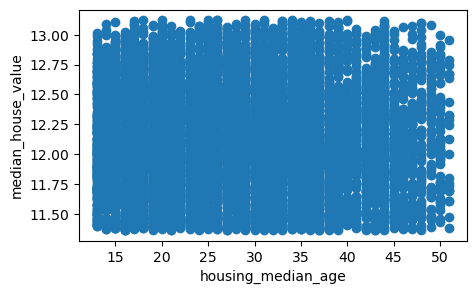

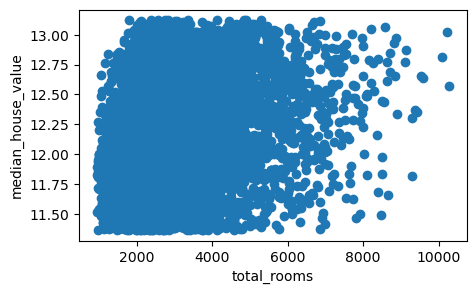

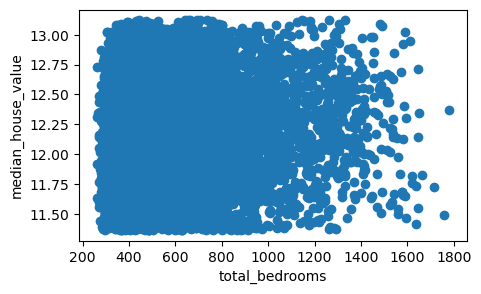

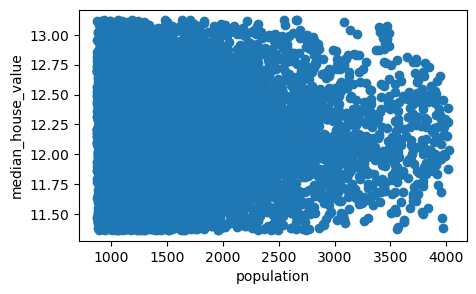

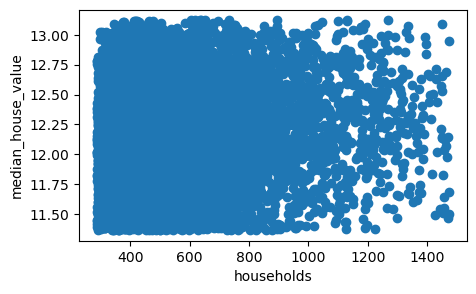

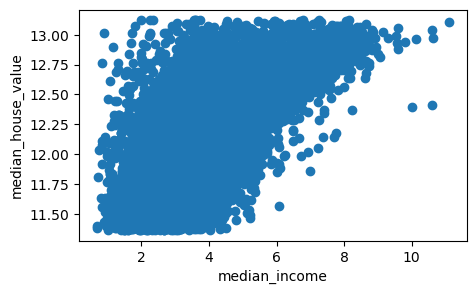

In [18]:
# pass the data to the plot function
plot(input_data, np.log(target_data), input_cols)

#### Most of them are not linear and the best data for the prediction of the price is median_income in the linear regression model

## Mutillinearity

In [19]:
# calculate the variance inflation factor to check if each input variables are correlated
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
vif = [variance_inflation_factor(input_data.values, i) for i in range(input_data.shape[1])]
vif_df = pd.DataFrame({'Features': input_data.columns, 'VIF': vif})
vif_df

,Features,VIF
0,housing_median_age,6.383921
1,total_rooms,38.685139
2,total_bedrooms,117.849567
3,population,19.876554
4,households,134.403412
5,median_income,10.291382
6,ocean_proximity,3.275726


#### total rooms are exclused from total bedrooms, so I don't need to drop it but I can drop households or popluation because households can potentialy represent popluation in that block vice versa.

In [21]:
# drop the population
input_data = input_data.drop(['households'], axis=1)
input_data

,housing_median_age,total_rooms,total_bedrooms,population,median_income,ocean_proximity
0,21,7099,1106.0,2401,8.3014,0
1,42,2555,665.0,1206,2.0804,0
2,50,2239,455.0,990,1.9911,0
3,42,1639,367.0,929,1.7135,0
4,50,2082,492.0,1131,1.6424,0
...,...,...,...,...,...,...
9312,15,2319,416.0,1047,3.1250,2
9313,27,2080,412.0,1082,2.5495,2
9314,28,2332,395.0,1041,3.7125,2
9315,17,2254,485.0,1007,1.7000,2


In [22]:
vif = [variance_inflation_factor(input_data.values, i) for i in range(input_data.shape[1])]
vif_df = pd.DataFrame({'Features': input_data.columns, 'VIF': vif})
vif_df

,Features,VIF
0,housing_median_age,6.372980
1,total_rooms,38.261617
2,total_bedrooms,36.367909
3,population,16.641417
4,median_income,10.263251
5,ocean_proximity,3.263098


## Feature selection

In [23]:
# calculate the p-values to determine the effect of each variable on the model
from sklearn.feature_selection import f_regression
p_values = f_regression(input_data, target_data)
p_values = p_values[1].round(3)

P_values_table = pd.DataFrame({'Features': input_data.columns, 'P_values': p_values})
P_values_table

,Features,P_values
0,housing_median_age,0.281
1,total_rooms,0.000
2,total_bedrooms,0.000
3,population,0.000
4,median_income,0.000
5,ocean_proximity,0.000


#### The lower the p value a feature has, the greater effect on the model

In [24]:
#input_data = input_data.drop(['housing_median_age'], axis=1)

## Normonalization

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
# scale the data 
scale = StandardScaler()
scale.fit(input_data)

scaled_input_data = scale.transform(input_data)
scaled_input_data

array([[-0.77208494,  3.34207019,  2.0307132 ,  1.16614872,  3.03211315,
        -1.66687231],
       [ 1.41727756, -0.28787001,  0.25271807, -0.68794444, -1.1999043 ,
        -1.66687231],
       [ 2.25132042, -0.54030423, -0.59394628, -1.02307759, -1.26065324,
        -1.66687231],
       ...,
       [-0.04229744, -0.46601188, -0.83585038, -0.94394893, -0.08962048,
         0.69424503],
       [-1.18910637, -0.52832159, -0.47299423, -0.99670137, -1.45868254,
         0.69424503],
       [-1.29336173, -0.10413624,  0.05516305, -0.40711526, -0.99024223,
         0.69424503]])

## Split data

In [27]:
# split the data into train, validation, and test
total_sampel_counts = input_data.shape[0]

train_data_counts = int(0.8*total_sampel_counts)
validation_data_counts = int(0.1*total_sampel_counts)
test_data_counts = total_sampel_counts - train_data_counts - validation_data_counts

In [28]:
print(total_sampel_counts, 
      train_data_counts, 
      validation_data_counts, 
      test_data_counts)

9317 7453 931 933


In [29]:
train_input = input_data[:train_data_counts]
train_target = target_data[:train_data_counts]

validation_input = input_data[train_data_counts: train_data_counts+validation_data_counts]
validation_target = target_data[train_data_counts: train_data_counts+validation_data_counts]

test_input = input_data[train_data_counts+validation_data_counts :]
test_target = target_data[train_data_counts+validation_data_counts :]

## Save them into npz

In [30]:
np.savez('train_data', inputs=train_input, targets=train_target)
np.savez('validation_data', inputs=validation_input, targets=validation_target)
np.savez('test_data', inputs=test_input, targets=test_target)